# **Looking for a non-trivial commutator of order 5**

In [this work](https://www.mdpi.com/2075-1680/13/4/274), the authors studied the spectral curve for a non-trivial commutator of operators of order 3. Here, intending to develop a similar theory for order 5 (or generically for order prime $p$), we will look for a non-trivial example of order 5 with a commutator.

More precisely, let $U = \{u_2,\ldots, u_5\}$ be a set of differential values with weights $2,3,4,5$ respectively, and consider the differential operator
$$L_5 = L = \partial^5 + u_2\partial^3 + u_3 \partial^2 + u_4\partial + u_5.$$
We would like to find a set of functions $z_2(x),\ldots,z_5(x)$ such that we can find a non-trivial commutator for the specialized operator $L_5(Z) = L_5(u=z)$.

In [1]:
import sys
sys.path.insert(0, "..") # dalgebra is here

from dalgebra import *
from dalgebra.commutators import *

import logging
from functools import lru_cache
import pickle
#%display latex

In [2]:
L_5 = generic_normal(5, "u"); L = L_5; z = L.parent().gen("z"); u = (0, 0) + L.parent().gens()[:-1]
L_5

u_2_0*z_3 + u_3_0*z_2 + u_4_0*z_1 + u_5_0*z_0 + z_5

## Some ideas

### **The almost commuting basis**

In [this paper](https://arxiv.org/abs/2405.05421), the authors show a method to compute a basis of differential operators $W(L_n) = \{P_m(U) : m \in \mathbb{N}\}$ such that all operators $P_m(U)$ almost commute with $L_n$, i.e., the order of $[L_n, P_m]\leq n-2$ and such that $P_m(U)$ is homogeneous of weight $m$ when considering $\partial$ with weight 1.

In this notebook, we are focusing on $n=5$, hence the order for almost commutation is $3$. This means that in this example, we have for all $m\in \mathbb{N}$:
$$[L, P_m(U)] = H_{m,0}(U) + H_{m,1}(U)\partial + H_{m,2}(U)\partial^2 + H_{m,3}(U)\partial^3,$$
where $H_{m,i}(U)$ are differential polynomials in the differential variables $U$, homogeneous of weight $n+m-i$.

For any given value of $m$, the value for $P_m(U)$ and $H_{m,i}(U)$ can be computed using the method `almost_commuting_wilson`:

In [ ]:
P, H = [z[0]], [[0,0,0,0]]
for i in range(1, 10):
    np, nh = almost_commuting_wilson(5,i)
    P.append(np)
    H.append(nh)

##### Some examples of the $P_m(U)$

In [ ]:
P[1]

In [ ]:
P[2]

In [ ]:
P[3]

In [ ]:
P[4]

In [ ]:
P[5]

### **The search for a non-trivial commutator**

As mentioned above, $W(L)$ is a $\mathbb{C}$-basis of all the almost commuting differential operators with the generic operator $L$. Let $\mathcal{W}(L)$ denote such space. Hence, for any operator $Q(U) \in \mathcal{W}(L)$, we have
$$[L, Q] = K_0(U) + K_1(U)\partial + K_2(U)\partial^2 + K_3(U)\partial^3.$$

We can be more precise. If $Q(U)$ has order $M$, then there is a linear combination of $P_m(U)$ for $m=0,\ldots,M$ leading to:
$$Q(U) = c_0 + c_1P_1(U) + \ldots + c_{M-1}P_{M-1}(U) + c_{M}P_M(U).$$

Due to the bilinear nature of $[\cdot,\cdot]$ it is easy to see that
$$K_i(U) = \sum_{m=0}^M c_m H_{m,i}(U).$$

Let us denote $H_m(U) = (H_{m,0}(U),H_{m,1}(U),H_{m,2}(U),H_{m,3}(U))^T$, and similarly with $K = (K_0(U), K_1(U), K_2(U), K_3(U))^T$ and $\mathbf{c} = (c_0,\ldots,c_M)^T$. Then, we can write the previous identity with:
$$K = (H_0 | H_1 | \ldots | H_M) \mathbf{c}.$$

It is *clear* from this point thet if we find a set of functions $Z=(z_2(x),z_3(x),z_4(x),z_5(x))$ and a list of constants $\mathbf{c}$ such that $K(Z) = 0$, then we would have found an operator $L(Z)$ or order 5 with a commutator $Q(Z)$.

In [ ]:
_,_,K6 = GetEquationsForSolution(6, 5, extract=None)

##### The equations for the order 6 commutator

In [ ]:
K6[0]

In [ ]:
K6[1]

In [ ]:
K6[2]

In [ ]:
K6[3]

##### Coming back to argument

These differential systems are tremendously difficult to solve. A first remark: the constants for $m\equiv 0\ (mod\ 5)$ never appear. This is clear since the influence of $L^{(m/5)}$ is not relevant for the commutation of the obtained operator $Q(U)$. 

In [ ]:
print(
    {
        g : 
        (
            tuple(el.order(g) for el in K6), 
            [
                [
                    el.degree(g[i]) for i in range(el.order(g)+1)
                ] for el in K6
            ]
        ) for g in K6[0].parent().remove_variables("z").gens()
    }
)

In [ ]:
RR = K6[0].parent().remove_variables("z")
DS = DSystem([RR(el) for el in K6], variables=RR.gens()[1:])

In [ ]:
eq = DS.equation(-1)
eq2 = DS.equation(-2)
U = eq.parent().gen("u_5")
rnk = RR.elimination_ranking()

In [ ]:
red1 = eq.derivative().coefficient_full(U[eq.order(U)+1])*eq2 - eq.derivative()*eq2.coefficient_full(U[eq2.order(U)])

In [ ]:
red2 = red1.derivative(times=2) * eq.coefficient_full(U[3]) - red1.derivative(times=2).coefficient_full(U[3]) * eq

In [ ]:
red3 = red1.derivative() * red2.coefficient_full(U[2]) - red1.derivative().coefficient_full(U[2]) * red2

In [ ]:
red4 = red1 * red3.coefficient_full(U[1]) - red1.coefficient_full(U[1]) * red3

In [ ]:
rnk.leader(red4)

In [ ]:
val_u_5 = (-red4.constant_coefficient(U),red4.coefficient_full(U[0]))

In [ ]:
poly_u_5 = RR.as_polynomials(*val_u_5)

In [ ]:
H = rnk.remainder(eq2, eq)

### **Exploring the differential system**

In [ ]:
C = K6[0].parent().base().gens()
n = 5
R = DifferentialRing(QQ[x,*C], [1] + len(C)*[0]).fraction_field()
x = R.gens()[0]

##### Case with $u_2 = 0$, $u_3 = 0$, $u_4 = 0$ ## **It leads to u_5 being a constant**

In [ ]:
rS = DSystem([el(u_2=0, u_3=0, u_4 = 0) for el in K6]); rS

In [ ]:
eq1 = rS.equation(-1); eq2 = rS.equation(-2)

In [ ]:
eq2 * 2/3 - eq1.derivative() # So either c_3 = 0 or u_5_1 = 0

In [ ]:
## Case with u_5_1 = 0
## Then this make all other equations to hold and we have u_5_0 a constant, getting the operator
##   L = D^5 + C.
## Which clearly have commutators since [D^m + C, D^n + E] = 0 for any n,m, C, E.

In [ ]:
## Case with c_3 = 0
rS = DSystem([el(u_2=0, u_3=0, u_4 = 0,c_3 = 0) for el in K6]); rS

In [ ]:
## Reducing equation 2 with equation 4 until we reach something fully reduced
9/8*((-2*C[6])*(rS.equation(-1).derivative(times=2) - 10/9 * rS.equation(-3)) - (4/9*C[4])*rS.equation(-1))
# So either (2*c_4^2 - 5*c_2*c_6) = 0 or u_5_1 = 0

In [ ]:
## Reducing equation 1 with equation 4 until we reach something fully reduced
## We assume that (2*c_4^2 - 5*c_2*c_6) = 0
E = (-2*C[6])*(rS.equation(-1).derivative(times=3) - 5*rS.equation(0)) - (C[4]*rS.equation(-1).derivative(times=1))
E

In [ ]:
## We remove manually the last term due to our condition on constants
E - E.coefficient(E.parent().0[2]) * E.parent().0[2]
# So we conclude that:
### Either u_5_1 = 0 (we saw that already and it was boring)
### Or (12*c_6^2)*u_5_0 + (10*c_1*c_6) = 0 and u_5_0 is a constant. So, again, boring.

##### Case with $u_j = 0$ except for a fixed $j_0 \neq 5$ ## **The operator $L$ already factors, so not interesting**

##### Case with $u_2 = 0, u_3 = 0$

In [ ]:
rS = DSystem([el(u_2=0, u_3=0,c_6=1) for el in K6]); U = rS.parent().gens()[1]; u = rS.parent().gens()[0]; rS

In [ ]:
## We eliminate u_5 using the last 2 equations
seq11 = (rS.equation(-1).derivative() - (2/3)*rS.equation(-2)); print(seq11)
seq12 = (-2*seq11.derivative(times=2)) - (2*C[3])*rS.equation(-1); print(seq12)
seq13 = seq12 - seq11*4*C[4]; seq13

In [ ]:
## We eliminate u_5 using the last equation and the second equation
seq21 = (rS.equation(-1).derivative(times=2) - 10/9*rS.equation(-3)); print(seq21) # order 3
seq22 = (-2)*seq21 - (4/9*C[4])*rS.equation(-1); print(seq22) # order 2
seq23 = rS.equation(-1).coefficient_full(U[3]) * seq22.derivative() - seq22.derivative().coefficient_full(U[3]) * rS.equation(-1); print(seq23) # order 2
seq24 = seq22 * seq23.coefficient_full(U[2]) - seq23 * seq22.coefficient_full(U[2]); print(seq24) # order 1
seq25 = seq24.derivative() * seq22.coefficient_full(U[2]) - seq22 * seq24.derivative().coefficient_full(U[2]); # order 1
seq26 = seq24 * seq25.coefficient_full(U[1]) - seq25 * seq24.coefficient_full(U[1]); print(seq26.order(U))
seq27 = seq26.derivative() * seq24.coefficient_full(U[1]) - seq26.derivative().coefficient_full(U[1]) * seq24
seq28 = seq26 * seq27.coefficient_full(U[0]) - seq27 * seq26.coefficient_full(U[0]); print(seq28.order(U))

In [ ]:
seq28.monomials()

In [ ]:
## We eliminate u_5 using the last equation and the first equation

##### Case with $u_2 = -1/x^2, u_3=u_4=0$ **NO SOLUTION**

In [ ]:
K6_eval = [el(u_2=(-1/x^2),u_3=0,u_4=0,c_6=25) for el in K6]
FR = K6_eval[0].parent().remove_variables("z")
K6_eval = [FR(el) for el in K6_eval]

In [ ]:
simplified_system = DSystem(K6_eval)

In [ ]:
A = simplified_system.equation(-1)
B = simplified_system.equation(-2)

In [ ]:
S = A.sylvester_resultant(B).coefficients()[0]

In [ ]:
print(S.numerator().polynomial(x.numerator().wrapped).coefficients())

##### Case $u_2 = -1/x^2$

In [ ]:
val_u_5_eval = [el(u_2=(-1/x^2)) for el in val_u_5]

In [ ]:
val_u_5_eval[0]

In [ ]:
K6_eval = [el(u_2=(-1/x^2)) for el in K6]
FR = K6_eval[0].parent().remove_variables("z")
K6_eval = [FR(el) for el in K6_eval]

In [ ]:
simplified_system = DSystem(K6_eval, variables=[FR.2])

In [ ]:
### Some statistics
[len(el.monomials()) for el in K6_eval]

In [ ]:
print({g : (tuple(el.order(g) for el in K6_eval), [[el.degree(g[i]) for i in range(el.order(g)+1)] for el in K6_eval]) for g in FR.gens()})

In [ ]:
S = A.sylvester_resultant(B, FR.2)

### **Looking for specific solutions**

##### Generic case

The first attemp here is to look for solutions of a specific shape. For example, let $x$ be a transcendental element such that $\partial(x) = 1$ and assume the weight of $x$ is $-1$ (so it satisfies that the derivative increases the weight by 1). Then we will see that, for $u_2$ to have weight equal to 2, we need that
$$u_2 = \frac{c+xp(x)}{x^2 (d + xq(x))},$$
where $c,d \in \mathbb{C}^*$ and $p(x), q(x) \in \mathbb{C}[x]$.

In [ ]:
C = K6[0].parent().base().gens()
d = 2; n = 5
A = [f"a_{i}_{j}" for i in range(2,n+1) for j in range(d+1)]
R = DifferentialRing(QQ[x,*A,*C], [1] + len(A)*[0] + len(C)*[0]).fraction_field()
A = [R(a) for a in A]
A = [A[i:i + d+1] for i in range(0, len(A), d+1)]
x = R.gens()[0]

In [ ]:
A

In [ ]:
u = L.parent().gens()[:4]
U = {u[i]: (-1)^(i+1)*(sum(a*x^j for (j,a) in enumerate(A[i]))/x^(i+2)) for i in range(len(u))}
U

In [ ]:
numerators = [(k(dic=U).coefficients()[0]).numerator().wrapped for k in K6]
B = numerators[0].parent()
X = B.0

In [ ]:
equations = sum((numerator.polynomial(X).coefficients() for numerator in numerators), [])
equations.sort(key=lambda k: len(k.coefficients()))

In [ ]:
I = ideal(equations)
solution = {"c_6": 1, "c_5": 0, "c_0": 0} # basic solution to start
# solution.update({"a_2_0": 1, "a_2_1": 0, "a_2_2": 0}) # solutions with u_2 = -1/x^2 # NO SOLUTION
# solution.update({"a_2_0": 1, "a_2_1": 0}) # solutions with u_2 = (-1+c*x^2)/x^2 # NO SOLUTION
# solution.update({"a_2_0": 1, "a_2_2": 0}) # solutions with u_2 = (-1+c*x)/x^2 # NO SOLUTION
# solution.update({"a_2_0": 0}) # 

In [ ]:
A

In [ ]:
I.elimination_ideal(A[0][0])

In [ ]:
I = ideal(el(**solution) for el in equations)

In [ ]:
ideal(el(**solution) for el in equations).groebner_basis()

In [ ]:
i = 0
for el in equations:
    rem = el(**solution)
    if rem != 0:
        show(latex(i) + r"\longrightarrow" + latex(rem.factor()))
        i+= 1

In [ ]:
#solutions = analyze_ideal(I, {"c_6": 1, "c_5": 0, "c_0": 0}, loglevel=logging.INFO)

## Examples

### **Cases with $u_i = a_i/x^i$**

##### The order 3

In [ ]:
n = 3
A = [f"a_{i}" for i in range(2,n+1)]
R = DifferentialRing(PolynomialRing(QQ, [x,*A]), [1] + len(A)*[0]).fraction_field()
A = [0,0] + [R(a) for a in A]
x = R.gens()[0]
U = {1: A[2]/x^2, 0: A[3]/x^3}

In [ ]:
L3, P5, I = GetEquationsForSolution(5, 3, U, extract=generate_polynomial_equations)
I_gb = I.groebner_basis()

In [ ]:
SOLS = analyze_ideal(
    ideal(I), 
    {"c_0": 0, "c_3": 0}, 
    [
        {f"c_{i}": None for i in range(2, 6)},
        {f"c_{i}": 0 for i in range(4, 6)},
        {f"a_{i}": 0 for i in range(2, 6)}
    ])

###### One example

In [ ]:
solution = {"a_2" : -12, "a_3" : 0, "c_3": 0, "c_0": 0, "c_1": 0, "c_2": 0, "c_4": 0}

In [ ]:
I_red = [eq(**solution) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
I_red

In [ ]:
L3(**solution)

In [ ]:
P5(**solution)

In [ ]:
L3_eval = L3(**solution)
P = dict()
for i in [5]:
    full_sol = {**solution}; full_sol[f"c_{i}"] = 1; full_sol.update({f"c_{j}": 0 for j in  [5] if i != j})
    P5_eval = P5(**full_sol)
    I_red = [eq(**full_sol) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
    P[i] = P5_eval
    print(i, "->", P5_eval, "\n Does it commute (0 is yes): ", L3_eval.lie_bracket(P5_eval, "z"))

In [ ]:
[3*i+1 for i in range(9)]

In [ ]:
L3_7, P7, I_7 = GetEquationsForSolution(7, 3, U, extract=generate_polynomial_equations)

In [ ]:
solution_7 = {"a_2" : -12, "a_3" : 0, "c_3": 0, "c_0": 0, "c_6": 0, "c_1": 0, "c_2": 0, "c_4": 0}
I_red7 = [eq(**solution_7) for eq in I_7.basis]; I_red7 = [el for el in I_red7 if el != 0]
I_red7

In [ ]:
P7(**solution_7)

In [ ]:
L3_eval_7 = L3_7(**solution_7)
P_7 = dict()
for i in [5,7]:
    full_sol = {**solution_7}; full_sol[f"c_{i}"] = 1; full_sol.update({f"c_{j}": 0 for j in [5,7] if i != j})
    P7_eval = P7(**full_sol)
    I_red_7 = [eq(**full_sol) for eq in I_7.basis]; I_red_7 = [el for el in I_red_7 if el != 0]
    P_7[i] = P7_eval
    print(i, "->", P7_eval, "\n Does it commute (0 is yes): ", L3_eval_7.lie_bracket(P7_eval, "z"))

##### The order 5 

In [3]:
n = 5
A = [f"a_{i}" for i in range(2,n+1)]
B = DifferentialRing(QQ[x], [1])
R = DifferentialRing(PolynomialRing(QQ, [x,*A]), [1] + len(A)*[0]).fraction_field()
A = [0,0] + [R(a) for a in A]
x = R.gens()[0]
U = {3: A[2]/x^2, 2: A[3]/x^3, 1: A[4]/x^4, 0: A[5]/x^5}

###### Getting the system

In [ ]:
Le, P9, I = GetEquationsForSolution(9, 5, U, extract=generate_polynomial_equations)
I_gb = I.groebner_basis()

In [ ]:
SOLS = analyze_ideal(
    ideal(I), 
    {"c_0": 0, "c_5": 0}, 
    [
        {f"c_{i}": None for i in range(2, 10)},
        {f"c_{i}": 0 for i in range(6, 10)},
        {f"a_{i}": 0 for i in range(2, 6)}
    ], groebner=False)

In [ ]:
with open("gb.txt", "w") as f:
    f.write("eqns_gb:={")
    for equ in I_gb:
        f.write(f"{equ},\n")
    f.write("};")

In [ ]:
with open("id.txt", "w") as f:
    f.write("eqns_id:={")
    for equ in I.basis:
        f.write(f"{equ},\n")
    f.write("};")

At this stage, we used Maple to solve the system in "id.txt". After some filtering we found a candidate that may be useful:

###### One example

In [ ]:
solution = {"a_2" : -20, "a_3" : 60, "a_4": 0, "a_5": -120, "c_1": 0, "c_2": 0, "c_3": 0, "c_5": 0, "c_0": 0}

In [ ]:
I_red = [eq(**solution) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
I_red

In [ ]:
Le(**solution)

In [ ]:
P9(**solution)

In [ ]:
Le(**solution).lie_bracket(P9(**solution), "z")

In [ ]:
Le_eval = Le(**solution)
P = dict()
for i in [4,6,7,8,9]:
    full_sol = {**solution}; full_sol[f"c_{i}"] = 1; full_sol.update({f"c_{j}": 0 for j in [4,6,7,8,9] if i != j})
    P9_eval = P9(**full_sol)
    I_red = [eq(**full_sol) for eq in I.basis]; I_red = [el for el in I_red if el != 0]
    P[i] = P9_eval
    print(i, "->", P9_eval, "\n Does it commute (0 is yes): ", Le_eval.lie_bracket(P9_eval, "z"))

This looks like a $L_4$ more than a $L_5$. In fact:

In [ ]:
P[4](z=P[4]) - P[8]

In [ ]:
Le_eval(z=P[4]) - P[9]

In [ ]:
8/x^2 * P[4]

In [ ]:
z[2](z=P[4]) - P[4](z=z[2])

In [ ]:
P[4]

In [ ]:
Le_eval

In [ ]:
4,5,6,7,8,9
L_5
A_1 = P_6
A_2 = P_7
A_3 = P_8
A_4 = P_4

In [ ]:
C[L_5, P_4, P_6, P_7]

In [ ]:
xgcd(5, 9)

In [ ]:
P[4](z=P[4](z=P[4])) - Le_eval(z=P[7])

###### Studying a solution

In [ ]:
def bounds(n, m):
    r'''
        For an operator L of order `n`, bound order of commutators for each congruence 
        class when a commutator of order `m` is known.
    '''
    if m%n == 0: raise ValueError("Error in `m`")
    output = {0: n, m%n : m}
    c = m
    while len(output) != n:
        c += m
        if (c%n) in output:
            pass
        else:
            output[c%n] = c - n
    return output
def flag_for_order(order, n, m, knowledge):
    result = knowledge.copy()
    result[f"c_{order}"] = 1
    for i in range(order+1, m+1): # everything beyond order to zero
        result[f"c_{i}"] = 0
    for i in range(0, order+1, n): # easy commutator -> we get a zero
        result[f"c_{i}"] = 0
    return result

In [ ]:
bounds(5,8)

In [ ]:
__CACHED_EQUATIONS = dict()
def _get_equations(m, n, solution, B, U):
    key = (m,n, tuple(sorted(solution.items())))
    if not key in __CACHED_EQUATIONS:
        print("Actually computing")
        nU = {k: B.fraction_field()(str(v(**solution))) for (k,v) in U.items()}
        __CACHED_EQUATIONS[key] = GetEquationsForSolution(m, n, nU, extract=generate_polynomial_equations)
    return __CACHED_EQUATIONS[key]

In [ ]:
def analyze_centralizer(n, solution, m, U, B):
    r'''
        Analyze the centralizer of L_n for a specific solution assuming there is a commutator of order `m`
    '''
    M = max(bounds(n,m).values())
    print("Getting the equations up to the computed bound")
    nL, nP, nI = _get_equations(M, n, solution, B, U)
    print("Starting analysis of centralizer...")
    A = {0: nL}
    i = 2; parts = [n]
    while i <= M and len(A) < n:
        if len(Partitions(i, parts_in=parts)) == 0:
            starting = flag_for_order(i, n, M, dict())
            nLe = nL(**starting)
            nPe = nP(**starting)
            nI_polys = sorted([nLe.parent().base().base().wrapped(p(**starting) if p.parent() != ZZ else p) for p in nI.gens()], key=lambda t: len(t.monomials()))
            nIe = ideal(p for p in nI_polys if p != 0) if nI != ideal([ZZ(0)]) else nI
            if nIe != ideal(1):
                print(f"Added a new commutator: {i}")
                S = analyze_ideal(nIe.groebner_basis(), starting, [])
                if len(S) > 1:
                    print(f"Multiple solutions in the case {i}")
                    A[i%n] = (starting, nLe, nPe, S)
                    parts.append(i)
                elif len(S) == 0:
                    print(f"No solutions in the case {i}")
                else:
                    A[i%n] = S[0].eval(nPe)
                    parts.append(i)
            else:
                print(f"Case {i} has no solution")
        else:
            print(f"Skipping case {i}: we already have it ready")
        i += 1
    return A

In [ ]:
A1 = analyze_centralizer(n, {"a_2" : -50, "a_3" : 40, "a_4": 240, "a_5": -240}, 6, U, B)
A1

In [ ]:
A2 = analyze_centralizer(n, {"a_2" : -50, "a_3" : 260, "a_4": -420, "a_5": 0}, 6, U, B)
A2

In [ ]:
A3 = analyze_centralizer(n, {"a_2" : -60, "a_3" : 240, "a_4": 0, "a_5": 0}, 6, U, B)
A3

In [ ]:
cases_only_6 = [[-50, 40, 240, -240],
[-50, 260, -420, 0],
[-80, 240, 1200, -2880], 
[-175, 525, 3955, -8960], 
[-20, 0, 0, 0],
[-25, 95, -50, -270], 
[-25, 55, 70, -70],
[-15, 75, -180, 180],
[-35, 35, 0, 0], 
[-55, 85, 235, -640],
[-60, 240, 0, 0], 
[-55, 245, -245, 0], 
[-125, 575, 1530, -7290], 
[-100, 200, 880, 0], 
[-55, 155, 340, -1620], 
[-40, 160, -320, 320], 
[-95, 445, 195, -3840], 
[-100, 400, 280, -3520], 
[-95, 125, 1155, 0], 
[-65, 375, -450, -1470], 
[-20, 80, -120, 0]]
cases_only_6 = [{f"a_{2+i}": v for (i,v) in enumerate(el)} for el in cases_only_6]

In [ ]:
As = []
for i, solution in enumerate(cases_only_6):
    print("##############################################################")
    print(f"Starting case {i+1}/{len(cases_only_6)}...")
    As.append(analyze_centralizer(n, solution, 6, U, B))
    print(f"Finished case {i+1}/{len(cases_only_6)}")

In [ ]:
A1 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 1}
A2 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 2}
A3 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 3}
A4 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 4}
A5 = {i: (cases_only_6[i], a) for (i,a) in enumerate(As) if len(a) == 5}

In [ ]:
A2.values()

In [ ]:
cases_only_6[2]

In [ ]:
A5

In [ ]:
with open("./result_commutator_A2.dmp", "wb") as file:
    pickle.dump(A2, file)
with open("./result_commutator_A3.dmp", "wb") as file:
    pickle.dump(A3, file)
with open("./result_commutator_A4.dmp", "wb") as file:
    pickle.dump(A4, file)
with open("./result_commutator_A5.dmp", "wb") as file:
    pickle.dump(A5, file)

###### Loading previous computations

In [4]:
with open("./result_commutator_A2.dmp", "rb") as file:
    A2 = pickle.load(file)
with open("./result_commutator_A3.dmp", "rb") as file:
    A3 = pickle.load(file)
with open("./result_commutator_A5.dmp", "rb") as file:
    A5 = pickle.load(file)

###### **Planar curve case**

In [5]:
L5 = A2[3][1][0]
P6 = A2[3][1][1]
fR = L5.parent().change_ring(B.fraction_field())
L5, P6 = fR(L5), fR(P6)
z = L5.parent().gen("z")

In [6]:
L5_l, P6_m = spectral_operators(L5, P6)

In [7]:
l,m = L5_l.parent().base().base().gens()[1:]

In [8]:
L5_l.sylvester_resultant(P6_m)

(lambda_^6 - mu^5)

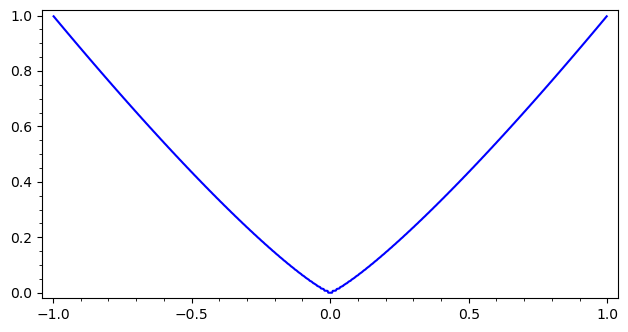

In [9]:
t1,t2 = var("t1,t2")
implicit_plot(t1^6 - t2^5, (t1,-1,1), (t2,0,1))

With this spectral curve, we can see that $(\zeta_6^i, 1)$ with $i=0,\ldots,5$ and $(1, \zeta_5^j)$ for $j=0,\ldots4$ are different points of the curve (getting a total of 10 different points)

In [25]:
sL5 = L5 + z[0]; sP6 = P6 - z[0]

In [26]:
f1 = sL5.parent().sylvester_subresultant_sequence(sL5, sP6, "z")[1]

In [27]:
f1

((x^21 - 35*x^18 - 1568*x^17 - 1134*x^16 - 17920*x^15 - 2527616*x^12 - 70447104*x^11 - 342921600*x^10 + 426310649856*x^6 + 1011902201856*x^5 + 17495789070090240)/x^21)*z_0 + ((x^20 - 35*x^18 - 567*x^16 - 631904*x^12 - 68584320*x^10 + 60901521408*x^6 + 1749578907009024)/x^20)*z_1

In [17]:
al_rat = (-f1.coefficient(z[0])/f1.coefficient(z[1])).parent().base().wrapped.fraction_field()(-f1.coefficient(z[0])/f1.coefficient(z[1]))
num = al_rat.numerator()
denom = al_rat.denominator()

In [30]:
al_rat

(x^11 - 35*x^10 + 630*x^9 - 7798*x^8 + 73808*x^7 - 559664*x^6 + 3461472*x^5 - 17428320*x^4 + 69713280*x^3 - 209139840*x^2 + 418279680*x - 418279680)/(x^11 - 35*x^10 + 595*x^9 - 6608*x^8 + 53984*x^7 - 343728*x^6 + 1742832*x^5 - 6971328*x^4 + 20913984*x^3 - 41827968*x^2 + 41827968*x)

Then we can conlude that the solution to $p(x)\phi(x) + q(x)\phi'(x) = 0$ is a solution to the spectral instance $(L_5 - 1)\phi(x)$, where the coefficients $p(x),q(x)$ are:
* $p(x) = -(x^{11} - 35x^{10} + 630x^9 - 7798x^8 + 73808x^7 - 559664x^6 + 3461472x^5 - 17428320x^4 + 69713280x^3 - 209139840x^2 + 418279680x - 418279680)$
* $q(x) = x (x^{10} - 35x^9 + 595x^8 - 6608x^7 + 53984x^6 - 343728x^5 + 1742832x^4 - 6971328x^3 + 20913984x^2 - 41827968x + 41827968)$

###### **Spacial curve case**

In [ ]:
L5 = A3[9][1][0]
P6 = A3[9][1][1]
P8 = A3[9][1][3](c_6=0)
fR = L5.parent().change_ring(B.fraction_field())
L5, P6, P8 = fR(L5), fR(P6), fR(P8)

In [ ]:
L5_l, P6_m, P8_n = spectral_operators(L5, P6, P8)

In [ ]:
p1 = L5_l.sylvester_resultant(P6_m); p1

In [ ]:
p2 = L5_l.sylvester_resultant(P8_n); p2

In [ ]:
p3 = P6_m.sylvester_resultant(P8_n); p3

In [ ]:
## Converting equations to algebraic
p1 = p1.parent().base().base().wrapped(p1)
p2 = p2.parent().base().base().wrapped(p2)
p3 = p3.parent().base().base().wrapped(p3); print(p3)
p3 = p3.factor()[0][0]
I = ideal(p1,p2,p3); I

In [ ]:
I.groebner_basis()

###### **All possible generators case**

In [ ]:
L5 = A5[5][1][0]
P6 = A5[5][1][1]
P7 = A5[5][1][2]
P8 = A5[5][1][3]
P9 = A5[5][1][4]

In [ ]:
L5_l, P6_m, P7_n, P8_p, P9_z = spectral_operators(L5, P6, P7, P8, P9)

In [ ]:
## We compute the equations from L, P_i and convert to algebraic setting
equs = [L5_l.sylvester_resultant(p) for p in [P6_m, P7_n, P8_p, P9_z]]
fR = equs[0].parent().base().base().wrapped
equs = [fR(p) for p in equs]
used_vars = list(set(sum((p.variables() for p in equs), tuple())))
fR = fR.remove_var(*[v for v in fR.gens() if v not in used_vars])
equs = [fR(p) for p in equs]
for i,p in enumerate(equs):
    print(i, "->", p)

In [ ]:
fR.remove_var?